In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install yfinance

     |████████████████████████████████| 5.5MB 6.5MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=038df802e280400f0db6ffeb4a5b1a791ed6fee56507365475cc81377923f74c
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [4]:
import yfinance as yf

data = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        tickers = "SPCB",

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "60d",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "30m",

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        group_by = 'ticker',

        # adjust all OHLC automatically
        # (optional, default is False)
        auto_adjust = True,

        # download pre/post regular market hours data
        # (optional, default is False)
        prepost = False,

        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        threads = True,

        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        proxy = None
    )

data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Datetime,,,,,
2020-12-23 09:30:00-05:00,1.0600,1.0742,1.060,1.0700,66264
2020-12-23 10:00:00-05:00,1.0650,1.0890,1.050,1.0800,94708
2020-12-23 10:30:00-05:00,1.0750,1.1000,1.070,1.0900,77573
2020-12-23 11:00:00-05:00,1.0919,1.1000,1.060,1.0700,98697
2020-12-23 11:30:00-05:00,1.0796,1.0900,1.065,1.0664,81052
...,...,...,...,...,...
2021-03-22 13:30:00-04:00,1.9250,1.9600,1.910,1.9400,209651
2021-03-22 14:00:00-04:00,1.9394,1.9400,1.900,1.9100,130100
2021-03-22 14:30:00-04:00,1.9100,1.9100,1.870,1.8850,341337


In [5]:
prices = data.reset_index()
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 775 entries, 0 to 774
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype                           
---  ------    --------------  -----                           
 0   Datetime  775 non-null    datetime64[ns, America/New_York]
 1   Open      775 non-null    float64                         
 2   High      775 non-null    float64                         
 3   Low       775 non-null    float64                         
 4   Close     775 non-null    float64                         
 5   Volume    775 non-null    int64                           
dtypes: datetime64[ns, America/New_York](1), float64(4), int64(1)
memory usage: 36.5 KB


In [6]:
prices['Datetime'] = prices['Datetime'].astype(str)

In [7]:
#remove -5:00
prices['Datetime'] = prices['Datetime'].str.replace('-05:00',"")

In [8]:
prices = prices[(prices['Datetime']>= '2021-01-06 09:30:00') & (prices['Datetime']<='2021-02-13 15:30:00')]
prices

,Datetime,Open,High,Low,Close,Volume
99,2021-01-06 09:30:00,1.0919,1.12,1.0919,1.1200,268467
100,2021-01-06 10:00:00,1.1100,1.11,1.1000,1.1000,41646
101,2021-01-06 10:30:00,1.1040,1.11,1.0801,1.0899,112913
102,2021-01-06 11:00:00,1.0800,1.11,1.0800,1.0900,86793
103,2021-01-06 11:30:00,1.1000,1.10,1.0900,1.0901,23568
...,...,...,...,...,...,...
445,2021-02-12 13:30:00,2.0600,2.08,2.0500,2.0700,38133
446,2021-02-12 14:00:00,2.0700,2.07,2.0500,2.0600,74721
447,2021-02-12 14:30:00,2.0573,2.06,1.9701,2.0300,384499
448,2021-02-12 15:00:00,2.0300,2.05,2.0100,2.0200,116154


In [9]:
sentiment = pd.read_csv('/content/drive/MyDrive/FA PROJECT 2021/Correlation/Supercom/spcb_tweets_1Month.csv',lineterminator='\n')
sentiment.head()

,Datetime,Text,processed_tweet
0,2021-01-06 02:26:27+00:00,@MrKennethPowers $SPCB Had some interesting vo...,spcb had some interesting volume today
1,2021-01-06 03:17:47+00:00,@domwalsh1973 @therealyorkie @spcb I’m saying ...,im saying the graph says that which the origin...
2,2021-01-06 03:27:16+00:00,@domwalsh1973 @therealyorkie @spcb Stop trying...,stop trying equate points invalidate them yes ...
3,2021-01-06 07:59:54+00:00,@pete_i9876 @therealyorkie @spcb To believe th...,i9876 to believe that something has causedk u...
4,2021-01-06 08:16:55+00:00,"In short, they lie. #Casedemic #LockdownsDontW...",in short they lie casedemic lockdownsdontwork


In [10]:
sentiment = sentiment.rename(columns={'Datetime': 'created_at'})

In [11]:
#remove +00:00
sentiment['created_at'] = sentiment['created_at'].str.slice(0,19)
sentiment.head()

,created_at,Text,processed_tweet
0,2021-01-06 02:26:27,@MrKennethPowers $SPCB Had some interesting vo...,spcb had some interesting volume today
1,2021-01-06 03:17:47,@domwalsh1973 @therealyorkie @spcb I’m saying ...,im saying the graph says that which the origin...
2,2021-01-06 03:27:16,@domwalsh1973 @therealyorkie @spcb Stop trying...,stop trying equate points invalidate them yes ...
3,2021-01-06 07:59:54,@pete_i9876 @therealyorkie @spcb To believe th...,i9876 to believe that something has causedk u...
4,2021-01-06 08:16:55,"In short, they lie. #Casedemic #LockdownsDontW...",in short they lie casedemic lockdownsdontwork


In [12]:
# convert datetime and created at to same datetime object
prices['Datetime'] = pd.to_datetime(prices['Datetime'])
sentiment['created_at'] = pd.to_datetime(sentiment['created_at'])

In [13]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351 entries, 99 to 449
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Datetime  351 non-null    datetime64[ns]
 1   Open      351 non-null    float64       
 2   High      351 non-null    float64       
 3   Low       351 non-null    float64       
 4   Close     351 non-null    float64       
 5   Volume    351 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 19.2 KB


In [14]:
prices

,Datetime,Open,High,Low,Close,Volume
99,2021-01-06 09:30:00,1.0919,1.12,1.0919,1.1200,268467
100,2021-01-06 10:00:00,1.1100,1.11,1.1000,1.1000,41646
101,2021-01-06 10:30:00,1.1040,1.11,1.0801,1.0899,112913
102,2021-01-06 11:00:00,1.0800,1.11,1.0800,1.0900,86793
103,2021-01-06 11:30:00,1.1000,1.10,1.0900,1.0901,23568
...,...,...,...,...,...,...
445,2021-02-12 13:30:00,2.0600,2.08,2.0500,2.0700,38133
446,2021-02-12 14:00:00,2.0700,2.07,2.0500,2.0600,74721
447,2021-02-12 14:30:00,2.0573,2.06,1.9701,2.0300,384499
448,2021-02-12 15:00:00,2.0300,2.05,2.0100,2.0200,116154


In [15]:
# only close column is needed
prices = prices.drop(columns=['Open','High','Low','Volume'])

In [16]:
sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1915 entries, 0 to 1914
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   created_at       1915 non-null   datetime64[ns]
 1   Text             1915 non-null   object        
 2   processed_tweet  1915 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 45.0+ KB


In [17]:
sentiment

,created_at,Text,processed_tweet
0,2021-01-06 02:26:27,@MrKennethPowers $SPCB Had some interesting vo...,spcb had some interesting volume today
1,2021-01-06 03:17:47,@domwalsh1973 @therealyorkie @spcb I’m saying ...,im saying the graph says that which the origin...
2,2021-01-06 03:27:16,@domwalsh1973 @therealyorkie @spcb Stop trying...,stop trying equate points invalidate them yes ...
3,2021-01-06 07:59:54,@pete_i9876 @therealyorkie @spcb To believe th...,i9876 to believe that something has causedk u...
4,2021-01-06 08:16:55,"In short, they lie. #Casedemic #LockdownsDontW...",in short they lie casedemic lockdownsdontwork
...,...,...,...
1910,2021-02-12 21:44:56,Get alerts and updates and free trading analys...,get alerts and updates and free trading analys...
1911,2021-02-12 21:50:00,$MP - This GEM has more potential. join us\n\n...,mp this gem has more potential join us sonm t...
1912,2021-02-12 22:50:52,Keep going Chris 👏👏👏 https://t.co/azqfrGcNDF,keep going chris
1913,2021-02-12 23:00:58,SINCE DECEMBER!\n$EMAN: +241%\n$TBLT: +146%\n$...,since december eman tblt sonm dgly spcb c...


In [18]:
sentiment = sentiment.rename(columns={'created_at': 'Datetime'})
sentiment

,Datetime,Text,processed_tweet
0,2021-01-06 02:26:27,@MrKennethPowers $SPCB Had some interesting vo...,spcb had some interesting volume today
1,2021-01-06 03:17:47,@domwalsh1973 @therealyorkie @spcb I’m saying ...,im saying the graph says that which the origin...
2,2021-01-06 03:27:16,@domwalsh1973 @therealyorkie @spcb Stop trying...,stop trying equate points invalidate them yes ...
3,2021-01-06 07:59:54,@pete_i9876 @therealyorkie @spcb To believe th...,i9876 to believe that something has causedk u...
4,2021-01-06 08:16:55,"In short, they lie. #Casedemic #LockdownsDontW...",in short they lie casedemic lockdownsdontwork
...,...,...,...
1910,2021-02-12 21:44:56,Get alerts and updates and free trading analys...,get alerts and updates and free trading analys...
1911,2021-02-12 21:50:00,$MP - This GEM has more potential. join us\n\n...,mp this gem has more potential join us sonm t...
1912,2021-02-12 22:50:52,Keep going Chris 👏👏👏 https://t.co/azqfrGcNDF,keep going chris
1913,2021-02-12 23:00:58,SINCE DECEMBER!\n$EMAN: +241%\n$TBLT: +146%\n$...,since december eman tblt sonm dgly spcb c...


In [19]:
# drop na of sentiment
sentiment = sentiment.dropna()

In [20]:
df_merge = pd.merge_asof(sentiment,prices,left_on='Datetime',right_on="Datetime",direction='backward')
df_merge

,Datetime,Text,processed_tweet,Close
0,2021-01-06 02:26:27,@MrKennethPowers $SPCB Had some interesting vo...,spcb had some interesting volume today,NaN
1,2021-01-06 03:17:47,@domwalsh1973 @therealyorkie @spcb I’m saying ...,im saying the graph says that which the origin...,NaN
2,2021-01-06 03:27:16,@domwalsh1973 @therealyorkie @spcb Stop trying...,stop trying equate points invalidate them yes ...,NaN
3,2021-01-06 07:59:54,@pete_i9876 @therealyorkie @spcb To believe th...,i9876 to believe that something has causedk u...,NaN
4,2021-01-06 08:16:55,"In short, they lie. #Casedemic #LockdownsDontW...",in short they lie casedemic lockdownsdontwork,NaN
...,...,...,...,...
1910,2021-02-12 21:44:56,Get alerts and updates and free trading analys...,get alerts and updates and free trading analys...,2.02
1911,2021-02-12 21:50:00,$MP - This GEM has more potential. join us\n\n...,mp this gem has more potential join us sonm t...,2.02
1912,2021-02-12 22:50:52,Keep going Chris 👏👏👏 https://t.co/azqfrGcNDF,keep going chris,2.02
1913,2021-02-12 23:00:58,SINCE DECEMBER!\n$EMAN: +241%\n$TBLT: +146%\n$...,since december eman tblt sonm dgly spcb c...,2.02


In [21]:
df_merge1 = df_merge[df_merge.Close.notnull()]
df_merge1

,Datetime,Text,processed_tweet,Close
9,2021-01-06 10:17:43,$DGLY $SPCB $CETX $BKYI $VISL\n\nWill be a ho...,dgly spcb cetx bkyi visl will be a hot sector ...,1.1000
10,2021-01-06 12:13:39,Pollution compliance is a key metric for inves...,pollution compliance is a key metric for inves...,1.1050
11,2021-01-06 12:44:43,#GASenate Democrat sweep is particularly bulli...,gasenate democrat sweep is particularly bullis...,1.1000
12,2021-01-06 12:55:14,While $CHEK squeeze was predicated on a recent...,while chek squeeze was predicated on a recent ...,1.1000
13,2021-01-06 13:48:43,Current holdings: \n\n$RETO\n$HUSN (#2)\n$CREG...,current holdings reto husn creg mdrr spcb mo...,1.1389
...,...,...,...,...
1910,2021-02-12 21:44:56,Get alerts and updates and free trading analys...,get alerts and updates and free trading analys...,2.0200
1911,2021-02-12 21:50:00,$MP - This GEM has more potential. join us\n\n...,mp this gem has more potential join us sonm t...,2.0200
1912,2021-02-12 22:50:52,Keep going Chris 👏👏👏 https://t.co/azqfrGcNDF,keep going chris,2.0200
1913,2021-02-12 23:00:58,SINCE DECEMBER!\n$EMAN: +241%\n$TBLT: +146%\n$...,since december eman tblt sonm dgly spcb c...,2.0200


In [22]:
df_6jan = df_merge1[(df_merge1['Datetime']<='2021-01-06 15:30:00') & (df_merge1['Datetime']>='2021-01-06 09:00:00')]
df_7jan = df_merge1[(df_merge1['Datetime']<='2021-01-07 15:30:00') & (df_merge1['Datetime']>='2021-01-07 09:00:00')]
df_8jan = df_merge1[(df_merge1['Datetime']<='2021-01-08 15:30:00') & (df_merge1['Datetime']>='2021-01-08 09:00:00')]

df_11jan = df_merge1[(df_merge1['Datetime']<='2021-01-11 15:30:00') & (df_merge1['Datetime']>='2021-01-11 09:00:00')]
df_12jan = df_merge1[(df_merge1['Datetime']<='2021-01-12 15:30:00') & (df_merge1['Datetime']>='2021-01-12 09:00:00')]
df_13jan = df_merge1[(df_merge1['Datetime']<='2021-01-13 15:30:00') & (df_merge1['Datetime']>='2021-01-13 09:00:00')]
df_14jan = df_merge1[(df_merge1['Datetime']<='2021-01-14 15:30:00') & (df_merge1['Datetime']>='2021-01-14 09:00:00')]
df_15jan = df_merge1[(df_merge1['Datetime']<='2021-01-15 15:30:00') & (df_merge1['Datetime']>='2021-01-15 09:00:00')]

df_18jan = df_merge1[(df_merge1['Datetime']<='2021-01-18 15:30:00') & (df_merge1['Datetime']>='2021-01-18 09:00:00')]
df_19jan = df_merge1[(df_merge1['Datetime']<='2021-01-19 15:30:00') & (df_merge1['Datetime']>='2021-01-19 09:00:00')]
df_20jan = df_merge1[(df_merge1['Datetime']<='2021-01-20 15:30:00') & (df_merge1['Datetime']>='2021-01-20 09:00:00')]
df_21jan = df_merge1[(df_merge1['Datetime']<='2021-01-21 15:30:00') & (df_merge1['Datetime']>='2021-01-21 09:00:00')]
df_22jan = df_merge1[(df_merge1['Datetime']<='2021-01-22 15:30:00') & (df_merge1['Datetime']>='2021-01-22 09:00:00')]

df_25jan = df_merge1[(df_merge1['Datetime']<='2021-01-25 15:30:00') & (df_merge1['Datetime']>='2021-01-25 09:00:00')]
df_26jan = df_merge1[(df_merge1['Datetime']<='2021-01-26 15:30:00') & (df_merge1['Datetime']>='2021-01-26 09:00:00')]
df_27jan = df_merge1[(df_merge1['Datetime']<='2021-01-27 15:30:00') & (df_merge1['Datetime']>='2021-01-27 09:00:00')]
df_28jan = df_merge1[(df_merge1['Datetime']<='2021-01-28 15:30:00') & (df_merge1['Datetime']>='2021-01-28 09:00:00')]
df_29jan = df_merge1[(df_merge1['Datetime']<='2021-01-29 15:30:00') & (df_merge1['Datetime']>='2021-01-29 09:00:00')]

df_1feb = df_merge1[(df_merge1['Datetime']<='2021-02-01 15:30:00') & (df_merge1['Datetime']>='2021-02-01 09:00:00')]
df_2feb = df_merge1[(df_merge1['Datetime']<='2021-02-02 15:30:00') & (df_merge1['Datetime']>='2021-02-02 09:00:00')]
df_3feb = df_merge1[(df_merge1['Datetime']<='2021-02-03 15:30:00') & (df_merge1['Datetime']>='2021-02-03 09:00:00')]
df_4feb = df_merge1[(df_merge1['Datetime']<='2021-02-04 15:30:00') & (df_merge1['Datetime']>='2021-02-04 09:00:00')]
df_5feb = df_merge1[(df_merge1['Datetime']<='2021-02-05 15:30:00') & (df_merge1['Datetime']>='2021-02-05 09:00:00')]

df_8feb = df_merge1[(df_merge1['Datetime']<='2021-02-08 15:30:00') & (df_merge1['Datetime']>='2021-02-08 09:00:00')]
df_9feb = df_merge1[(df_merge1['Datetime']<='2021-02-09 15:30:00') & (df_merge1['Datetime']>='2021-02-09 09:00:00')]
df_10feb = df_merge1[(df_merge1['Datetime']<='2021-02-10 15:30:00') & (df_merge1['Datetime']>='2021-02-10 09:00:00')]
df_11feb = df_merge1[(df_merge1['Datetime']<='2021-02-11 15:30:00') & (df_merge1['Datetime']>='2021-02-11 09:00:00')]
df_12feb = df_merge1[(df_merge1['Datetime']<='2021-02-12 15:30:00') & (df_merge1['Datetime']>='2021-02-12 09:00:00')]

In [23]:
frames = [df_6jan,df_7jan,df_8jan,df_11jan, df_12jan, 
          df_13jan,df_14jan,df_15jan,df_18jan,df_19jan,
          df_20jan,df_21jan,df_22jan,df_25jan,df_26jan,
           df_27jan,df_28jan,df_29jan,df_1feb,df_2feb,
          df_3feb,df_4feb,df_5feb,df_8feb,df_9feb,
          df_10feb,df_11feb,df_12feb
          ] 

df_final = pd.concat((frames) , axis = 0)
df_final

,Datetime,Text,processed_tweet,Close
9,2021-01-06 10:17:43,$DGLY $SPCB $CETX $BKYI $VISL\n\nWill be a ho...,dgly spcb cetx bkyi visl will be a hot sector ...,1.1000
10,2021-01-06 12:13:39,Pollution compliance is a key metric for inves...,pollution compliance is a key metric for inves...,1.1050
11,2021-01-06 12:44:43,#GASenate Democrat sweep is particularly bulli...,gasenate democrat sweep is particularly bullis...,1.1000
12,2021-01-06 12:55:14,While $CHEK squeeze was predicated on a recent...,while chek squeeze was predicated on a recent ...,1.1000
13,2021-01-06 13:48:43,Current holdings: \n\n$RETO\n$HUSN (#2)\n$CREG...,current holdings reto husn creg mdrr spcb mo...,1.1389
...,...,...,...,...
1893,2021-02-12 14:02:00,SINCE DECEMBER!\n$EMAN: +241%\n$TBLT: +146%\n$...,since december eman tblt sonm dgly spcb c...,2.0600
1894,2021-02-12 14:07:29,@amianto_spcb Hahahahah❤️,spcb hahahahah,2.0600
1895,2021-02-12 14:30:29,@UsforThemUK @BorisJohnson Another rock solid ...,another rock solid promise from our jelly pm h...,2.0300
1896,2021-02-12 14:33:14,Also adding all $SPCB dips still have 1/3 of m...,also adding all spcb dips still have of my ent...,2.0300


In [24]:
df_final = df_final.reset_index(drop=True)
df_final

,Datetime,Text,processed_tweet,Close
0,2021-01-06 10:17:43,$DGLY $SPCB $CETX $BKYI $VISL\n\nWill be a ho...,dgly spcb cetx bkyi visl will be a hot sector ...,1.1000
1,2021-01-06 12:13:39,Pollution compliance is a key metric for inves...,pollution compliance is a key metric for inves...,1.1050
2,2021-01-06 12:44:43,#GASenate Democrat sweep is particularly bulli...,gasenate democrat sweep is particularly bullis...,1.1000
3,2021-01-06 12:55:14,While $CHEK squeeze was predicated on a recent...,while chek squeeze was predicated on a recent ...,1.1000
4,2021-01-06 13:48:43,Current holdings: \n\n$RETO\n$HUSN (#2)\n$CREG...,current holdings reto husn creg mdrr spcb mo...,1.1389
...,...,...,...,...
544,2021-02-12 14:02:00,SINCE DECEMBER!\n$EMAN: +241%\n$TBLT: +146%\n$...,since december eman tblt sonm dgly spcb c...,2.0600
545,2021-02-12 14:07:29,@amianto_spcb Hahahahah❤️,spcb hahahahah,2.0600
546,2021-02-12 14:30:29,@UsforThemUK @BorisJohnson Another rock solid ...,another rock solid promise from our jelly pm h...,2.0300
547,2021-02-12 14:33:14,Also adding all $SPCB dips still have 1/3 of m...,also adding all spcb dips still have of my ent...,2.0300


In [25]:
df_final["Comp"] = ''
df_final["Negative"] = ''
df_final["Neutral"] = ''
df_final["Positive"] = ''
df_final

,Datetime,Text,processed_tweet,Close,Comp,Negative,Neutral,Positive
0,2021-01-06 10:17:43,$DGLY $SPCB $CETX $BKYI $VISL\n\nWill be a ho...,dgly spcb cetx bkyi visl will be a hot sector ...,1.1000,,,,
1,2021-01-06 12:13:39,Pollution compliance is a key metric for inves...,pollution compliance is a key metric for inves...,1.1050,,,,
2,2021-01-06 12:44:43,#GASenate Democrat sweep is particularly bulli...,gasenate democrat sweep is particularly bullis...,1.1000,,,,
3,2021-01-06 12:55:14,While $CHEK squeeze was predicated on a recent...,while chek squeeze was predicated on a recent ...,1.1000,,,,
4,2021-01-06 13:48:43,Current holdings: \n\n$RETO\n$HUSN (#2)\n$CREG...,current holdings reto husn creg mdrr spcb mo...,1.1389,,,,
...,...,...,...,...,...,...,...,...
544,2021-02-12 14:02:00,SINCE DECEMBER!\n$EMAN: +241%\n$TBLT: +146%\n$...,since december eman tblt sonm dgly spcb c...,2.0600,,,,
545,2021-02-12 14:07:29,@amianto_spcb Hahahahah❤️,spcb hahahahah,2.0600,,,,
546,2021-02-12 14:30:29,@UsforThemUK @BorisJohnson Another rock solid ...,another rock solid promise from our jelly pm h...,2.0300,,,,
547,2021-02-12 14:33:14,Also adding all $SPCB dips still have 1/3 of m...,also adding all spcb dips still have of my ent...,2.0300,,,,


In [26]:
df_final['processed_tweet'] = df_final['processed_tweet'].astype(str)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Datetime         549 non-null    datetime64[ns]
 1   Text             549 non-null    object        
 2   processed_tweet  549 non-null    object        
 3   Close            549 non-null    float64       
 4   Comp             549 non-null    object        
 5   Negative         549 non-null    object        
 6   Neutral          549 non-null    object        
 7   Positive         549 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 34.4+ KB


In [27]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
df_final['Comp'] = [analyzer.polarity_scores(x)['compound'] for x in df_final['processed_tweet']]
df_final['Negative'] = [analyzer.polarity_scores(x)['neg'] for x in df_final['processed_tweet']]
df_final['Neutral'] = [analyzer.polarity_scores(x)['neu'] for x in df_final['processed_tweet']]
df_final['Positive'] = [analyzer.polarity_scores(x)['pos'] for x in df_final['processed_tweet']]

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [28]:
df_final

,Datetime,Text,processed_tweet,Close,Comp,Negative,Neutral,Positive
0,2021-01-06 10:17:43,$DGLY $SPCB $CETX $BKYI $VISL\n\nWill be a ho...,dgly spcb cetx bkyi visl will be a hot sector ...,1.1000,0.6124,0.000,0.828,0.172
1,2021-01-06 12:13:39,Pollution compliance is a key metric for inves...,pollution compliance is a key metric for inves...,1.1050,0.0000,0.000,1.000,0.000
2,2021-01-06 12:44:43,#GASenate Democrat sweep is particularly bulli...,gasenate democrat sweep is particularly bullis...,1.1000,0.8316,0.000,0.799,0.201
3,2021-01-06 12:55:14,While $CHEK squeeze was predicated on a recent...,while chek squeeze was predicated on a recent ...,1.1000,0.7351,0.044,0.791,0.165
4,2021-01-06 13:48:43,Current holdings: \n\n$RETO\n$HUSN (#2)\n$CREG...,current holdings reto husn creg mdrr spcb mo...,1.1389,0.0000,0.000,1.000,0.000
...,...,...,...,...,...,...,...,...
544,2021-02-12 14:02:00,SINCE DECEMBER!\n$EMAN: +241%\n$TBLT: +146%\n$...,since december eman tblt sonm dgly spcb c...,2.0600,0.2960,0.000,0.913,0.087
545,2021-02-12 14:07:29,@amianto_spcb Hahahahah❤️,spcb hahahahah,2.0600,0.0000,0.000,1.000,0.000
546,2021-02-12 14:30:29,@UsforThemUK @BorisJohnson Another rock solid ...,another rock solid promise from our jelly pm h...,2.0300,0.1531,0.095,0.744,0.161
547,2021-02-12 14:33:14,Also adding all $SPCB dips still have 1/3 of m...,also adding all spcb dips still have of my ent...,2.0300,0.0000,0.000,1.000,0.000


% of positive tweets=  42.25865209471767
% of negative tweets=  13.661202185792352


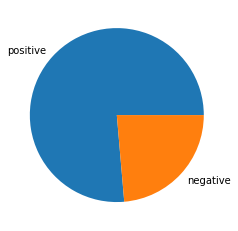

In [29]:
posi=0
nega=0
for i in range (0,len(df_final)):
    get_val=df_final['Comp'][i]
    if(float(get_val)<(0)):
        nega=nega+1
    if(float(get_val>(0))):
        posi=posi+1
posper=(posi/(len(df_final)))*100
negper=(nega/(len(df_final)))*100
print("% of positive tweets= ",posper)
print("% of negative tweets= ",negper)

arr=np.asarray([posper,negper], dtype=int)
plt.pie(arr,labels=['positive','negative'])
plt.plot()
plt.show()

In [30]:
df_final = df_final.groupby(df_final.Datetime.dt.floor('30min')).mean()
df_final

,Close,Comp,Negative,Neutral,Positive
Datetime,,,,,
2021-01-06 10:00:00,1.1000,0.612400,0.000000,0.828000,0.172000
2021-01-06 12:00:00,1.1050,0.000000,0.000000,1.000000,0.000000
2021-01-06 12:30:00,1.1000,0.783350,0.022000,0.795000,0.183000
2021-01-06 13:30:00,1.1389,0.000000,0.000000,1.000000,0.000000
2021-01-07 10:00:00,1.1400,-0.599400,0.112000,0.888000,0.000000
...,...,...,...,...,...
2021-02-12 11:30:00,2.1007,0.296000,0.000000,0.913000,0.087000
2021-02-12 12:00:00,2.1200,0.670500,0.000000,0.776000,0.224000
2021-02-12 13:00:00,2.0700,0.296000,0.000000,0.913000,0.087000


In [31]:
df_final = df_final.drop(columns=['Negative','Neutral','Positive'])
df_final

,Close,Comp
Datetime,,
2021-01-06 10:00:00,1.1000,0.612400
2021-01-06 12:00:00,1.1050,0.000000
2021-01-06 12:30:00,1.1000,0.783350
2021-01-06 13:30:00,1.1389,0.000000
2021-01-07 10:00:00,1.1400,-0.599400
...,...,...
2021-02-12 11:30:00,2.1007,0.296000
2021-02-12 12:00:00,2.1200,0.670500
2021-02-12 13:00:00,2.0700,0.296000


In [32]:
from sklearn import preprocessing

x = df_final.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

In [33]:
df = df.set_index(df_final.index)
df

,0,1
Datetime,,
2021-01-06 10:00:00,0.000000,0.825016
2021-01-06 12:00:00,0.003937,0.494988
2021-01-06 12:30:00,0.000000,0.917143
2021-01-06 13:30:00,0.030630,0.494988
2021-01-07 10:00:00,0.031496,0.171966
...,...,...
2021-02-12 11:30:00,0.787953,0.654505
2021-02-12 12:00:00,0.803150,0.856327
2021-02-12 13:00:00,0.763780,0.654505


In [34]:
result = df_final.join(df)
result

,Close,Comp,0,1
Datetime,,,,
2021-01-06 10:00:00,1.1000,0.612400,0.000000,0.825016
2021-01-06 12:00:00,1.1050,0.000000,0.003937,0.494988
2021-01-06 12:30:00,1.1000,0.783350,0.000000,0.917143
2021-01-06 13:30:00,1.1389,0.000000,0.030630,0.494988
2021-01-07 10:00:00,1.1400,-0.599400,0.031496,0.171966
...,...,...,...,...
2021-02-12 11:30:00,2.1007,0.296000,0.787953,0.654505
2021-02-12 12:00:00,2.1200,0.670500,0.803150,0.856327
2021-02-12 13:00:00,2.0700,0.296000,0.763780,0.654505


In [35]:
result = result.rename(columns={0: 'normalised_close', 1: 'normalised_comp'})
result

,Close,Comp,normalised_close,normalised_comp
Datetime,,,,
2021-01-06 10:00:00,1.1000,0.612400,0.000000,0.825016
2021-01-06 12:00:00,1.1050,0.000000,0.003937,0.494988
2021-01-06 12:30:00,1.1000,0.783350,0.000000,0.917143
2021-01-06 13:30:00,1.1389,0.000000,0.030630,0.494988
2021-01-07 10:00:00,1.1400,-0.599400,0.031496,0.171966
...,...,...,...,...
2021-02-12 11:30:00,2.1007,0.296000,0.787953,0.654505
2021-02-12 12:00:00,2.1200,0.670500,0.803150,0.856327
2021-02-12 13:00:00,2.0700,0.296000,0.763780,0.654505


In [36]:
result.corr()

,Close,Comp,normalised_close,normalised_comp
Close,1.000000,-0.095623,1.000000,-0.095623
Comp,-0.095623,1.000000,-0.095623,1.000000
normalised_close,1.000000,-0.095623,1.000000,-0.095623
normalised_comp,-0.095623,1.000000,-0.095623,1.000000


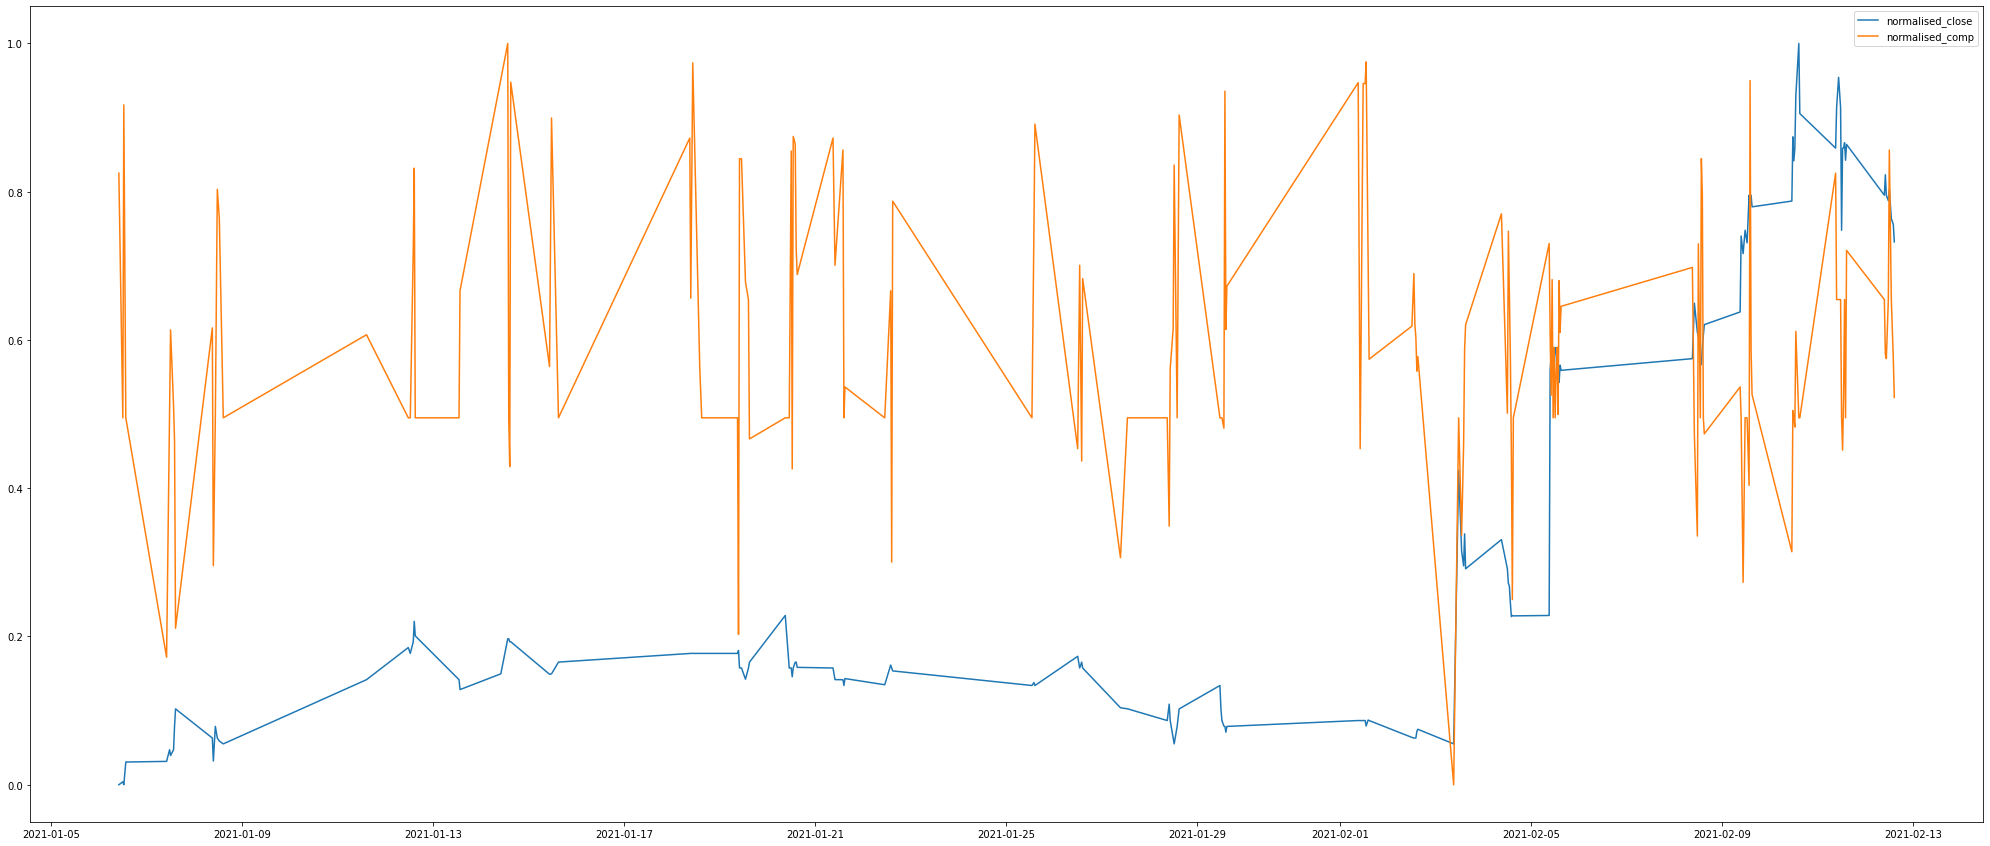

In [37]:
#Plot graphs
fig = plt.figure(figsize=(35,15))
plt.plot(result.index,result['normalised_close'], label = "normalised_close")
plt.plot(result.index,result['normalised_comp'], label = "normalised_comp")
plt.legend()
plt.show()

In [38]:
corr = result.corr()
correlation = (corr['Close'][-1])
counter = 0
while (abs(correlation)<0.3):
  counter = counter - 1
  if counter == len(result):
    break
  else:
    result['Close'] = result['Close'].shift(counter)
  corr = result.corr()
  correlation = (corr['Close'][-1])

In [39]:
result

,Close,Comp,normalised_close,normalised_comp
Datetime,,,,
2021-01-06 10:00:00,NaN,0.612400,0.000000,0.825016
2021-01-06 12:00:00,NaN,0.000000,0.003937,0.494988
2021-01-06 12:30:00,NaN,0.783350,0.000000,0.917143
2021-01-06 13:30:00,NaN,0.000000,0.030630,0.494988
2021-01-07 10:00:00,NaN,-0.599400,0.031496,0.171966
...,...,...,...,...
2021-02-12 11:30:00,NaN,0.296000,0.787953,0.654505
2021-02-12 12:00:00,NaN,0.670500,0.803150,0.856327
2021-02-12 13:00:00,NaN,0.296000,0.763780,0.654505


In [40]:
result.corr()

,Close,Comp,normalised_close,normalised_comp
Close,NaN,NaN,NaN,NaN
Comp,NaN,1.000000,-0.095623,1.000000
normalised_close,NaN,-0.095623,1.000000,-0.095623
normalised_comp,NaN,1.000000,-0.095623,1.000000


In [41]:
final_result = result.dropna()
final_result

,Close,Comp,normalised_close,normalised_comp
Datetime,,,,
